<a href="https://colab.research.google.com/github/VineetSivadasan/houses/blob/main/ONS_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [172]:
# import all three datasets and turn them into pandas dataframes 
df_crime = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/On_Street_Crime_In_Camden.csv')
df_ward_atlas = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ward-atlas-data.csv', encoding= 'unicode_escape')  #non-ascii characters in the csv that can not be encoded/decoded hence must use unicode escape
df_ward_profile = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ward-atlas-data.csv', encoding= 'unicode_escape')

In [173]:
df_crime.head

<bound method NDFrame.head of                             Category  ...                Location
0                        Other theft  ...    (51.5318, -0.123189)
1              Anti-social behaviour  ...  (51.528169, -0.131558)
2              Theft from the person  ...  (51.542741, -0.174124)
3              Anti-social behaviour  ...  (51.529611, -0.121652)
4                              Drugs  ...  (51.565544, -0.149851)
...                              ...  ...                     ...
285102         Theft from the person  ...  (51.524772, -0.133427)
285103                 Bicycle theft  ...  (51.544885, -0.151958)
285104         Theft from the person  ...   (51.516738, -0.12812)
285105  Violence and sexual offences  ...  (51.519577, -0.122584)
285106         Anti-social behaviour  ...  (51.556503, -0.178968)

[285107 rows x 20 columns]>

In [174]:
# Look at the shape of the crime dataset and the types of data
df_crime.shape, df_crime.dtypes

((285107, 20), Category             object
 Street ID             int64
 Street Name          object
 Context             float64
 Outcome Category     object
 Outcome Date         object
 Service              object
 Location Subtype     object
 ID                    int64
 Persistent ID        object
 Epoch                object
 Ward Code            object
 Ward Name            object
 Easting             float64
 Northing            float64
 Longitude           float64
 Latitude            float64
 Spatial Accuracy     object
 Last Uploaded        object
 Location             object
 dtype: object)

In [175]:
#check to see if there are any NaN values in the dataset
checking_NaN = df_crime.isnull().values.any() 
checking_NaN

True

In [176]:
#locate rows where null values appear
NaN_rows = df_crime[df_crime.isnull().any(axis=1)]  
NaN_rows.shape

(285107, 20)

In [177]:
#locate columns where null values appear
NaN_columns = df_crime.isna().any()
NaN_columns

Category            False
Street ID           False
Street Name         False
Context              True
Outcome Category     True
Outcome Date         True
Service             False
Location Subtype     True
ID                  False
Persistent ID        True
Epoch               False
Ward Code           False
Ward Name           False
Easting             False
Northing            False
Longitude           False
Latitude            False
Spatial Accuracy    False
Last Uploaded       False
Location            False
dtype: bool

In [178]:
#find out how many rows in 'Context' column has NaN values
context_nan = df_crime.Context.isnull().values.ravel().sum()
context_nan


285107

In [ ]:
#Given that all values in 'Context' are NaN values, drop this column
df_crime.drop(['Context'], axis=1, inplace=True)

In [181]:
#Given that 'Location' is just longitude and latitude values, drop this column
df_crime.drop(['Location'], axis=1, inplace=True)

In [182]:
#'Spatial Accuracy' doesn't give any useful information hence drop this column
df_crime.drop(['Spatial Accuracy'], axis=1, inplace=True)

In [183]:
df_crime.shape

(285107, 17)

In [184]:
#find out how many rows in 'Outcome Category' column has NaN values
outcome_cat_nan = df_crime['Outcome Category'].isnull().values.ravel().sum()
outcome_cat_nan

67292

In [185]:
#find out how many rows in 'Context' column has NaN values
outcome_date_nan = df_crime['Outcome Date'].isnull().values.ravel().sum()
outcome_date_nan


67292

In [186]:
#find out how many rows in 'Context' column has NaN values
location_nan = df_crime['Location Subtype'].isnull().values.ravel().sum()
location_nan

269410

In [187]:
#find out how many rows in 'Context' column has NaN values
persistent_nan = df_crime['Persistent ID'].isnull().values.ravel().sum()
persistent_nan

82519

In [188]:
#describe the Epoch column
df_crime['Epoch'].describe()

count                     285107
unique                        76
top       03/01/2019 12:00:00 AM
freq                        4694
Name: Epoch, dtype: object

# Let's look at the numbers of crimes commited across London for the time span of the dataset


In [189]:
#introduce a count of 1 for each crime 
df_crime['count'] = 1

In [190]:
df_crime.dtypes

Category             object
Street ID             int64
Street Name          object
Outcome Category     object
Outcome Date         object
Service              object
Location Subtype     object
ID                    int64
Persistent ID        object
Epoch                object
Ward Code            object
Ward Name            object
Easting             float64
Northing            float64
Longitude           float64
Latitude            float64
Last Uploaded        object
count                 int64
dtype: object

In [191]:
# Sum crimes by monthly date over the full dataset time period
total_crimes_bydate = df_crime.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_crimes_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude'], axis=1, inplace=True)     #remove all other columns
total_crimes_bydate['date'] = total_crimes_bydate.index        #create another column for the date, called date
total_crimes_bydate

,count,date
Epoch,,
01/01/2015 12:00:00 AM,3111,01/01/2015 12:00:00 AM
01/01/2016 12:00:00 AM,3244,01/01/2016 12:00:00 AM
01/01/2017 12:00:00 AM,3073,01/01/2017 12:00:00 AM
01/01/2018 12:00:00 AM,3802,01/01/2018 12:00:00 AM
01/01/2019 12:00:00 AM,4114,01/01/2019 12:00:00 AM
...,...,...
12/01/2016 12:00:00 AM,3420,12/01/2016 12:00:00 AM
12/01/2017 12:00:00 AM,3524,12/01/2017 12:00:00 AM
12/01/2018 12:00:00 AM,4057,12/01/2018 12:00:00 AM


In [193]:
#change the date format in 'Epoch' column
total_crimes_bydate['date'] = pd.to_datetime(total_crimes_bydate['date']).dt.date
total_crimes_bydate['date'] = pd.to_datetime(total_crimes_bydate['date']).dt.strftime('%d-%m-%Y')
total_crimes_bydate['date'] = pd.to_datetime(total_crimes_bydate.date)
total_crimes_bydate = total_crimes_bydate.sort_values(by = 'date')
total_crimes_bydate

,count,date
Epoch,,
01/01/2015 12:00:00 AM,3111,2015-01-01
02/01/2015 12:00:00 AM,3028,2015-02-01
03/01/2015 12:00:00 AM,3412,2015-03-01
04/01/2015 12:00:00 AM,3399,2015-04-01
05/01/2015 12:00:00 AM,3602,2015-05-01
...,...,...
12/01/2020 12:00:00 AM,3049,2020-12-01
01/01/2021 12:00:00 AM,2691,2021-01-01
02/01/2021 12:00:00 AM,2746,2021-02-01


Text(0.5, 1.0, 'crimes across London')

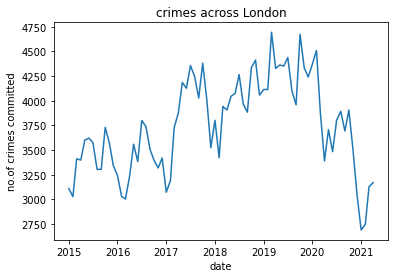

In [194]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_crimes_bydate['date'], total_crimes_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of crimes committed")
plt.title("crimes across London")

# Let's look at the categories of crimes

In [195]:
#describe the category column
df_crime['Category'].describe()

count                    285107
unique                       14
top       Anti-social behaviour
freq                      67292
Name: Category, dtype: object

In [196]:
#get all the unique categories of crime and the 'size' i.e. number of categories
C = len(df_crime['Category'].unique())
C, df_crime['Category'].unique()

(14, array(['Other theft', 'Anti-social behaviour', 'Theft from the person',
        'Drugs', 'Violence and sexual offences', 'Vehicle crime',
        'Possession of weapons', 'Burglary', 'Robbery', 'Public order',
        'Shoplifting', 'Other crime', 'Criminal damage and arson',
        'Bicycle theft'], dtype=object))

In [197]:
#create another category called 'category encoded' which contains the encoded crime categories,
df_crime['Category encoded'] = df_crime['Category'].astype('category')
df_crime['Category encoded'] = df_crime['Category encoded'].cat.codes
df_crime.dtypes, df_crime

(Category             object
 Street ID             int64
 Street Name          object
 Outcome Category     object
 Outcome Date         object
 Service              object
 Location Subtype     object
 ID                    int64
 Persistent ID        object
 Epoch                object
 Ward Code            object
 Ward Name            object
 Easting             float64
 Northing            float64
 Longitude           float64
 Latitude            float64
 Last Uploaded        object
 count                 int64
 Category encoded       int8
 dtype: object,
                             Category  Street ID  ... count Category encoded
 0                        Other theft    1489515  ...     1                6
 1              Anti-social behaviour     960522  ...     1                0
 2              Theft from the person     965233  ...     1               11
 3              Anti-social behaviour     960974  ...     1                0
 4                              Drugs     972275

In [198]:
d1 = df_crime.drop(['Street ID', 'Street Name', 'Outcome Category', 'Outcome Date', 'Service', 'Location Subtype', 'ID', 'Persistent ID', 'Epoch',   
 'Ward Code', 'Ward Name', 'Easting', 'Northing', 'Longitude', 'Latitude', 'Last Uploaded', 'count'], axis =1)
d1

,Category,Category encoded
0,Other theft,6
1,Anti-social behaviour,0
2,Theft from the person,11
3,Anti-social behaviour,0
4,Drugs,4
...,...,...
285102,Theft from the person,11
285103,Bicycle theft,1
285104,Theft from the person,11
285105,Violence and sexual offences,13


Text(0, 0.5, 'Latitude')

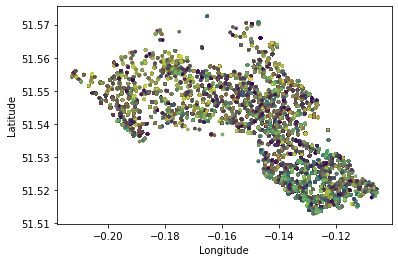

In [200]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_crime['Longitude'],df_crime['Latitude'], c=df_crime['Category encoded'], s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Let's look at ward

In [201]:
#describe the category column
df_crime['Ward Name'].describe()

count                        285107
unique                           18
top       Holborn and Covent Garden
freq                          40616
Name: Ward Name, dtype: object

In [202]:
#get all the unique Wards and the 'size' i.e. number of Wards
C = len(df_crime['Ward Name'].unique())
C, df_crime['Ward Name'].unique()

(18, array(['St Pancras and Somers Town', 'Swiss Cottage', "King's Cross",
        'Highgate', 'Camden Town with Primrose Hill', 'Haverstock',
        'Frognal and Fitzjohns', 'Belsize', 'Bloomsbury', 'Cantelowes',
        'Kilburn', 'Kentish Town', 'West Hampstead', 'Fortune Green',
        'Holborn and Covent Garden', "Regent's Park", 'Gospel Oak',
        'Hampstead Town'], dtype=object))

In [203]:
#create another category called 'ward encoded' which contains the encoded ward names,
df_crime['Ward encoded'] = df_crime['Ward Name'].astype('category')
df_crime['Ward encoded'] = df_crime['Ward encoded'].cat.codes
df_crime.dtypes, df_crime

(Category             object
 Street ID             int64
 Street Name          object
 Outcome Category     object
 Outcome Date         object
 Service              object
 Location Subtype     object
 ID                    int64
 Persistent ID        object
 Epoch                object
 Ward Code            object
 Ward Name            object
 Easting             float64
 Northing            float64
 Longitude           float64
 Latitude            float64
 Last Uploaded        object
 count                 int64
 Category encoded       int8
 Ward encoded           int8
 dtype: object,
                             Category  Street ID  ... Category encoded Ward encoded
 0                        Other theft    1489515  ...                6           15
 1              Anti-social behaviour     960522  ...                0           15
 2              Theft from the person     965233  ...               11           16
 3              Anti-social behaviour     960974  ...               

Text(0, 0.5, 'Latitude')

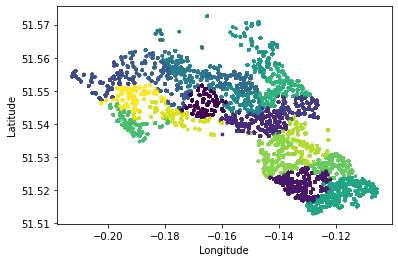

In [204]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_crime['Longitude'],df_crime['Latitude'], c=df_crime['Ward encoded'], s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [205]:
total_crimes_byward = df_crime.groupby(['Ward Name']).sum()      #sum 'count' number of crimes by date
total_crimes_byward.drop(['Street ID', 'Easting', 'Ward encoded','Northing', 'Category encoded', 'Longitude', 'Latitude', 'ID'], axis=1, inplace=True)     #remove all other columns
total_crimes_byward['Ward name'] = total_crimes_byward.index
total_crimes_byward

,count,Ward name
Ward Name,,
Belsize,8108,Belsize
Bloomsbury,36759,Bloomsbury
Camden Town with Primrose Hill,30958,Camden Town with Primrose Hill
Cantelowes,9895,Cantelowes
Fortune Green,7758,Fortune Green
Frognal and Fitzjohns,6239,Frognal and Fitzjohns
Gospel Oak,7725,Gospel Oak
Hampstead Town,8297,Hampstead Town
Haverstock,10225,Haverstock


Text(0, 0.5, 'crime count')

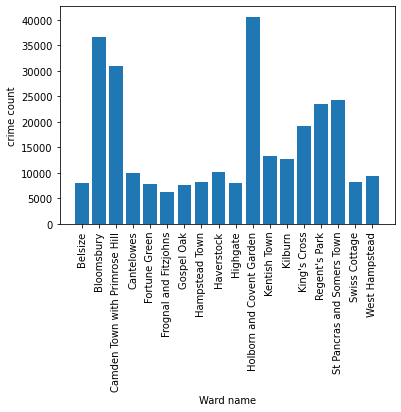

In [206]:
#plot of crime numbers by ward
plt.bar(total_crimes_byward['Ward name'],total_crimes_byward['count']) 
plt.xlabel('Ward name')
plt.xticks(rotation=90)
plt.ylabel('crime count')

#Let's look at street name

In [207]:
#describe the category column
df_crime['Street ID'].describe()

count    2.851070e+05
mean     9.923078e+05
std      1.198085e+05
min      5.875900e+05
25%      9.607560e+05
50%      9.649380e+05
75%      9.677150e+05
max      1.490652e+06
Name: Street ID, dtype: float64

In [208]:
#get all the unique Wards and the 'size' i.e. number of Wards
C = len(df_crime['Street ID'].unique())
C, df_crime['Street ID'].unique()

(1543, array([1489515,  960522,  965233, ..., 1490647, 1490652,  956138]))

In [209]:
total_crimes_bystreet = df_crime.groupby(['Street ID']).sum()      #sum 'count' number of crimes by date
total_crimes_bystreet.drop([ 'Easting', 'Northing', 'Ward encoded', 'Category encoded', 'Longitude', 'Latitude', 'ID'], axis=1, inplace=True)     #remove all other columns
total_crimes_bystreet['Street'] = total_crimes_bystreet.index        #create another column for the street ID, called Street
total_crimes_bystreet

,count,Street
Street ID,,
587590,21,587590
923580,912,923580
923593,64,923593
923811,148,923811
923812,151,923812
...,...,...
1490503,29,1490503
1490555,22,1490555
1490576,147,1490576


Text(0, 0.5, 'count')

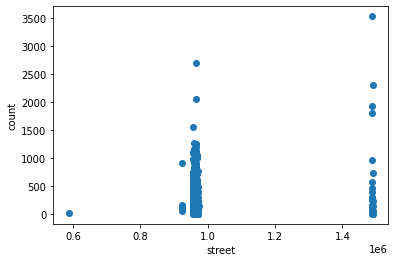

In [210]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(total_crimes_bystreet['Street'],total_crimes_bystreet['count']) #, c=df_crime['Ward encoded'], s=6,  alpha=0.25)
plt.xlabel('street')
plt.ylabel('count')

# PMCC Matrix

In [ ]:
df_cor_matrix = df_crime.drop(['count'], axis=1)

In [ ]:
corr_matrix_crime = df_cor_matrix.corr()
corr_matrix_crime.style.background_gradient(cmap='coolwarm')

In [ ]:
def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h), axis=1)).T

def cross_entropy(Y,P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def indices_to_one_hot(data, nb_classes):
  targets = np.array(data).reshape(-1)
  targets = targets.astype(int)
  return np.eye(nb_classes)[targets]

In [ ]:
class MVLogisticRegression():

  def __init__(self, thresh =0.5):
    self.thresh = thresh

  def fit(self, X, y, eta=2e-1, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    N,D =X.shape
    K = len(np.unique(y))
    y_values = np.unique(y, return_index=False)
    Y = indices_to_one_hot(y-1, K).astype(int)
    self.W = np.random.randn(D,K)
    self.B = np.random.randn(1,K)
    J=np.zeros(int(epochs))

    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch] = cross_entropy(Y,P_hat)
      self.W -= eta*(1/N)*X.T@(P_hat-Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y,axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel("$\matchcal{J}")
      plt.title("Training Curve")
      plt.show()
  
  def __forward__(self, X):
    return softmax(X@self.W + self.B)
  
  def predict(self,X):
    return np.argmax(self.__forward__(X), axis=1)